Titanic Dataset - The analysis of what sorts of people were likely to survive

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the files

In [42]:
titanic=pd.read_csv('titanic_train.csv')

Data Analysis 

In [43]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
titanic.info()
# According to the information provided, there is too many values missing in a cabin column. 
# The age column is rougly missing 20%. The followihng analusis will let us determine how to fill this column out.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
# Detecting the sum of missing values
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Exploration & Visualization

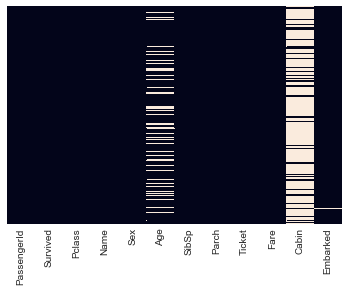

In [46]:
# visualisation of missing values
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

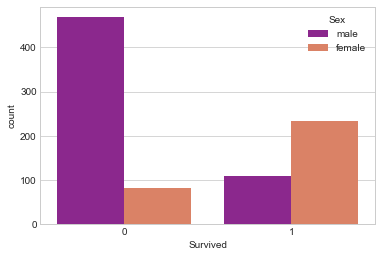

In [47]:
# Exploring the relationship between the chance of survival and gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = titanic, hue = 'Sex', palette = 'plasma' )

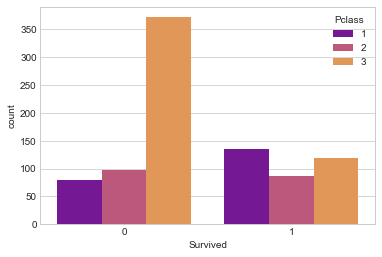

In [48]:
# Exploring the relationship between those who survived and the class they travelled in
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = titanic, hue = 'Pclass', palette = 'plasma' )

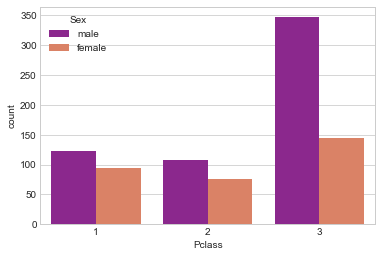

In [49]:
# Exploring the gender ratio within each class
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data = titanic, hue = 'Sex', palette = 'plasma' )

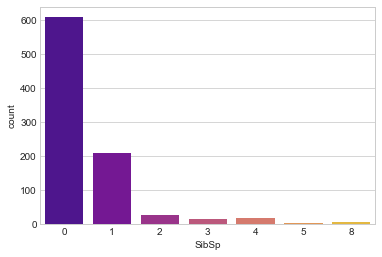

In [50]:
sns.countplot(x='SibSp', data=titanic, palette = 'plasma')

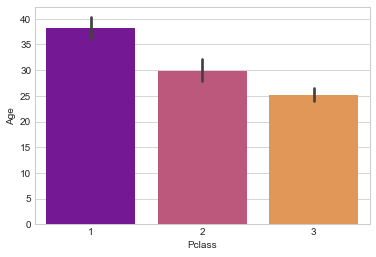

In [52]:
# Age analysis, since we are going to fill out missing values, age column
# needs to be carefully analyzed
sns.barplot(x='Pclass', y='Age', data = titanic, palette = 'plasma')

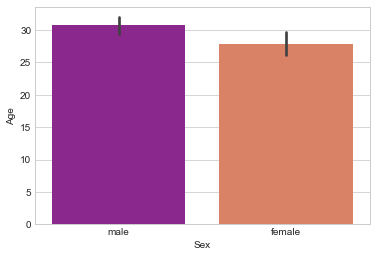

In [53]:
sns.barplot (x='Sex', y='Age', data = titanic, palette = 'plasma')

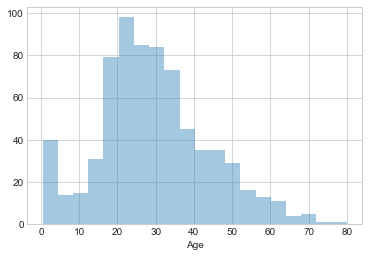

In [55]:
sns.distplot(titanic['Age'].dropna(), kde = False)

In [56]:
# It is reasonable to state that there is some variability in age among classes.
# Thus, we will fill the column with the mean among the classes
#Finding the mean of age column by using groupby function
titanic.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [25]:
# I am using the same code Jose Portilla showed in his lecture on Logistic regression
# Python for Data Science course on Udemy.
def impute_age(num):
    Age = num[0]
    Pclass = num[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [57]:
# Applying the function:
train['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [58]:
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping unnecessary columns

Converting categorical features

In [89]:
titanic.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [61]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [84]:
titanic = pd.concat([train,sex,embark],axis=1)

In [90]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building a logistic regression model

In [94]:
# Train test split
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

In [96]:
# Training and predicting
from sklearn.linear_model import LogisticRegression

In [97]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
predictions = logmodel.predict(X_test)

In [99]:
# Evaluations
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_test, predictions)
# We see that a little less than 80 % of survivors were predicted correctly 

array([[135,  19],
       [ 41,  73]], dtype=int64)